In [11]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [12]:
nap = pd.read_csv("NAP_category.csv")

In [13]:
nap.columns

Index(['Category', 'Advertiser Currency', 'Impressions', 'Clicks',
       'Total Conversions', 'Post-Click Conversions', 'Post-View Conversions',
       'Revenue (Adv Currency)'],
      dtype='object')

In [14]:
nap = nap.drop(["Advertiser Currency"], axis=1)

In [15]:
nap.columns = ['Category', 'Impressions', 'Clicks', 'Conversions',
       'PCConversions', 'PVConversions',
       'Spend']

In [16]:
nap = nap.drop(nap.index[1943:])

In [17]:
nap["CategorySummary"] = nap["Category"].str.split("/").str[1]

In [18]:
nap["CPA"] = nap.Spend / nap.Conversions

In [19]:
nap.head()

,Category,Impressions,Clicks,Conversions,PCConversions,PVConversions,Spend,CategorySummary,CPA
0,/Arts & Entertainment/TV & Video/TV Shows & Pr...,4289.0,0.0,1.0,0.0,1.0,27.004091,Arts & Entertainment,27.004091
1,/Autos & Vehicles/Vehicle Brands/Land Rover,229.0,0.0,1.0,0.0,1.0,1.564716,Autos & Vehicles,1.564716
2,/Finance/Credit & Lending/Credit Cards,998.0,1.0,0.0,0.0,0.0,7.519177,Finance,inf
3,/Real Estate/Commercial & Investment Real Estate,342.0,0.0,0.0,0.0,0.0,2.816406,Real Estate,inf
4,/Science/Biological Sciences,4857.0,5.0,4.0,0.0,4.0,41.511666,Science,10.377916


In [20]:
nap_p = nap.pivot_table(index="CategorySummary", values=["Impressions", "Clicks", "Conversions", "Spend"])

In [21]:
nap_p["CPA"] = nap_p.Spend / nap_p.Conversions

In [22]:
nap.CategorySummary.unique()

array(['Arts & Entertainment', 'Autos & Vehicles', 'Finance',
       'Real Estate', 'Science', 'World Localities',
       'Computers & Electronics', 'News', 'Beauty & Fitness', 'Games',
       'Shopping', 'Sports', 'Business & Industrial', 'Jobs & Education',
       'Law & Government', 'Health', 'Hobbies & Leisure', 'Pets & Animals',
       'Internet & Telecom', 'People & Society', 'Food & Drink',
       'Books & Literature', 'Reference', 'Travel', 'Home & Garden',
       'Online Communities'], dtype=object)

In [29]:
#replacing infinite number with 0
nap.CPA = nap.CPA.replace(np.inf, 0)

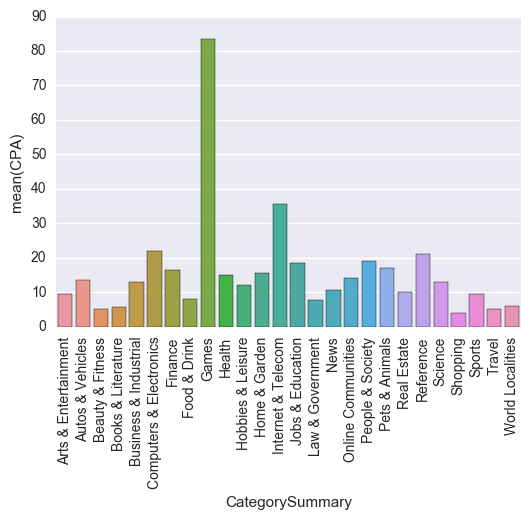

In [25]:
#pivoted chart against category summary
aaa = sns.barplot(data=nap_p, x=nap_p.index, y="CPA")
aaa = aaa.set_xticklabels(labels=nap_p.index, rotation=90)

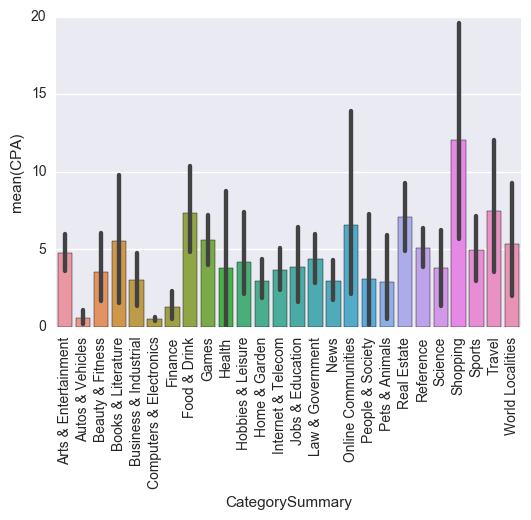

In [32]:
#plot directly from non-consolidated data 
bbb = sns.barplot(data=nap, x="CategorySummary", y="CPA")
bbb = bbb.set_xticklabels(labels=nap_p.index, rotation=90)